In [63]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('/content/drive/MyDrive/week2_python_task/heart_failure_clinical_records_dataset.csv')

In [66]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Column name description:**

Age: Age of the patient

Anaemia: Anemia is a condition in which the body does not have enough healthy red blood cells

Creatinine Phosphokinase: It is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle.

Diabetes: Poorly managed diabetes can damage blood vessels and nerves, increasing the likelihood of heart failure.

Ejection Fraction: The amount of blood pumped out of the heart

High Blood Pressure: High blood pressure can strain the heart and increase the risk of heart failure.

Platelets: Platelets, or thrombocytes, are small, colorless cell fragments in our blood that form clots and stop or prevent bleeding

Serum Creatinine: The serum (blood) creatinine test is a blood test used to check how well your kidneys are filtering your blood.

Serum Sodium: The sodium blood test measures the concentration of sodium in the blood

Sex: Gender differences can impact heart disease risk.

Smoking: Tobacco use damages blood vessels and increases the risk of heart failure.

In [67]:
df.info()
print()
print(f'Shape of the dataset')
print(f'Number of Columns: {df.shape[1]}')
print(f'Number of Rows: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

Shape of the data

**Checking for null values using isnull function**

**Using sum function to see the count of null values on each column**

In [68]:
df.isnull().sum() #checking null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Visualizing the NULL values

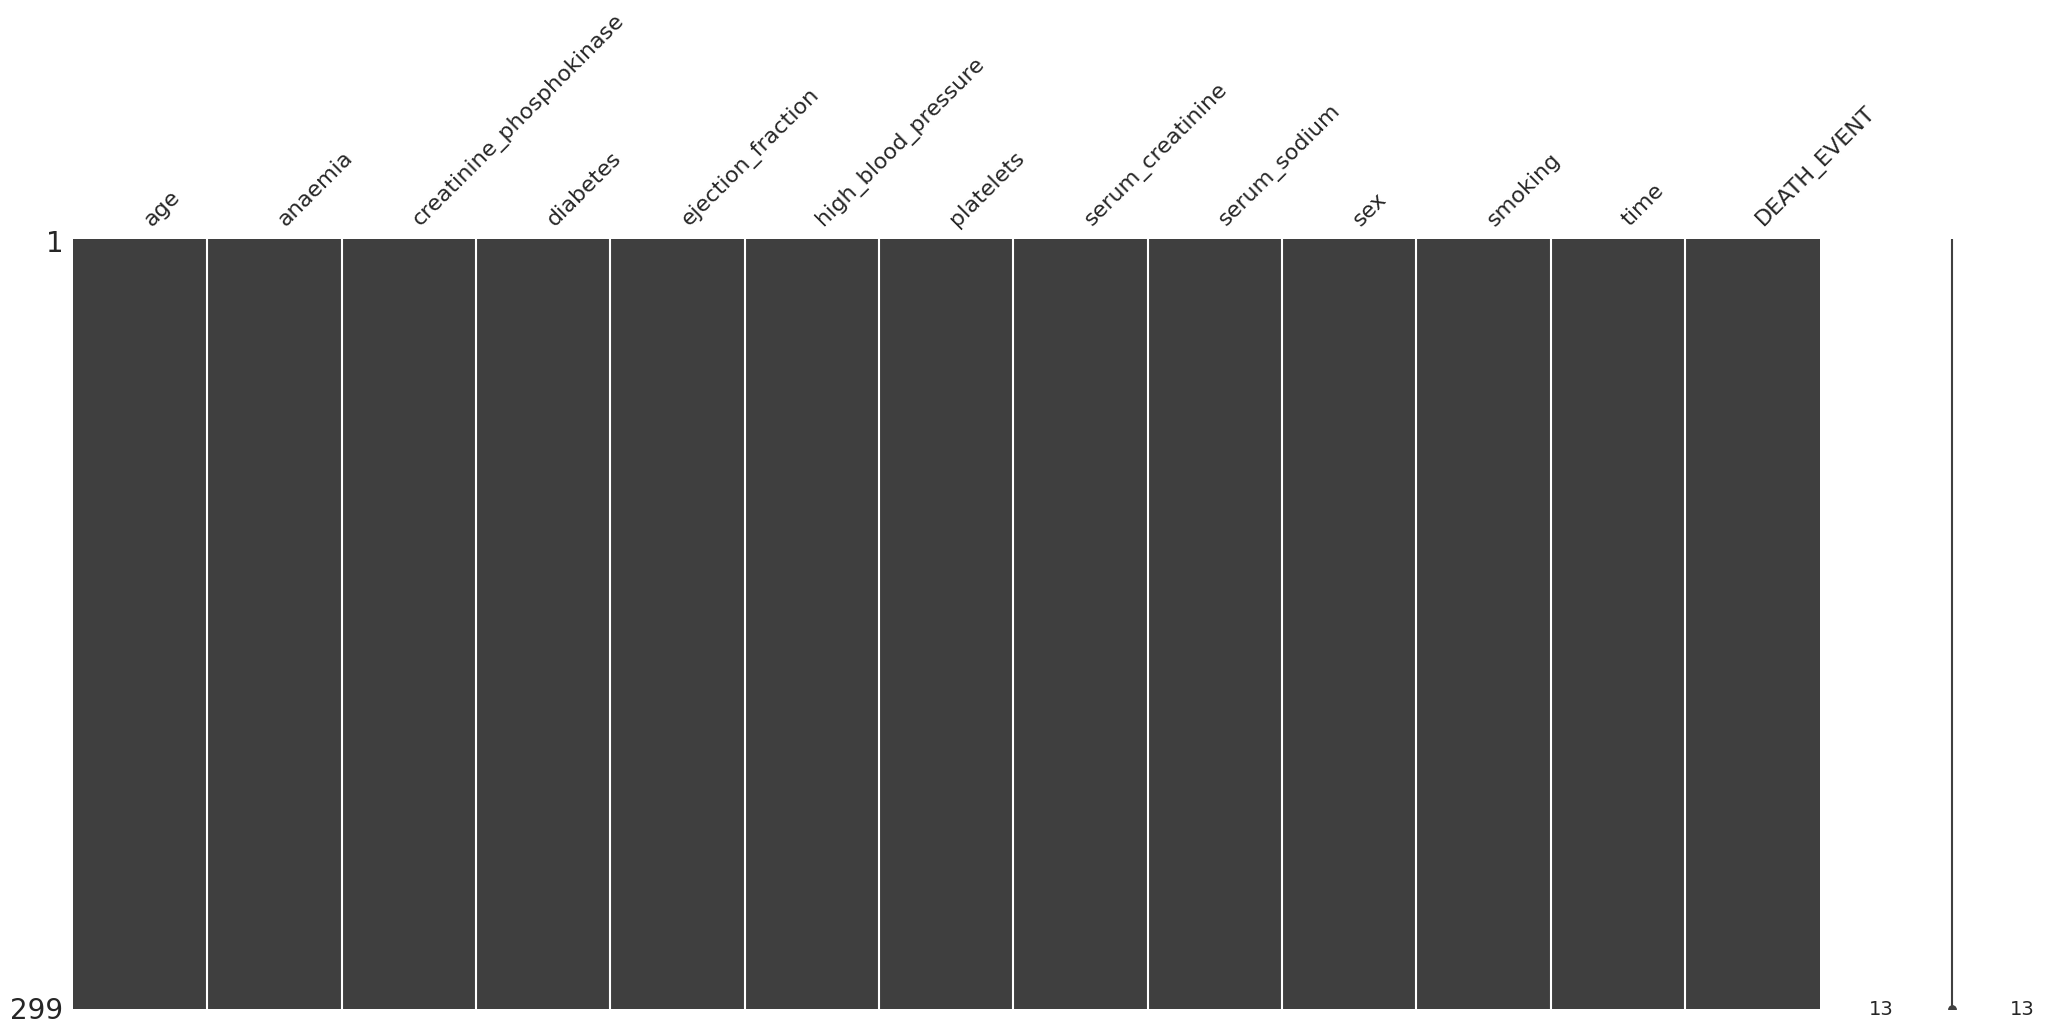

In [69]:
missingno.matrix(df, fontsize = 16)  #plotting to check null values
plt.show()

**Finding number of unique values on each Column**


In [70]:
df.nunique() #check unique values

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

**Finding the number of duplicated values**

In [71]:
df.duplicated().sum() #check for duplicated

0

In [98]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking', 'DEATH_EVENT'],
      dtype='object')

**Finding Outliers**

Box plot is used to visualize the outliers in the dataset.

<Axes: >

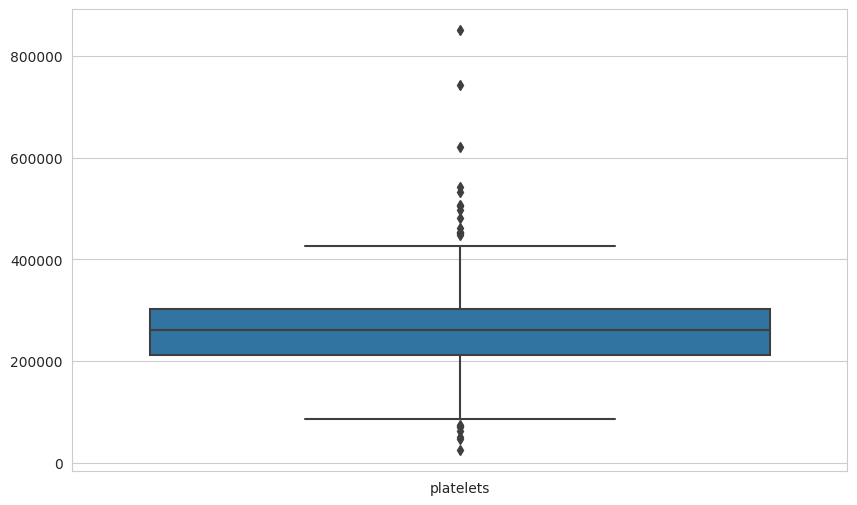

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['platelets']]) #box plot for platelets to find the outliers

Box plot is plotted for platelets dataset. From the plot,we trim the values between the values of 100000 to 410000

In [73]:
df = df[(df['platelets'] <= 410000) & (df['platelets'] >= 100000)] #trimming the outliers

<Axes: >

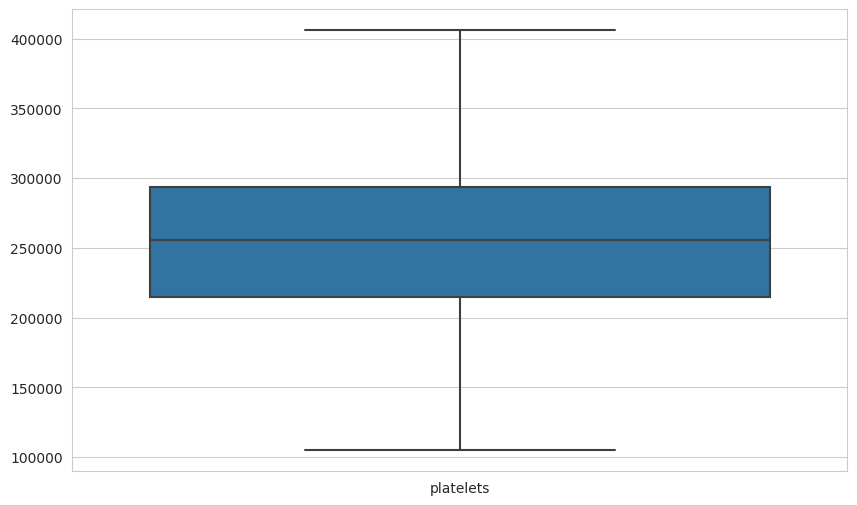

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['platelets']]) #box plot after trimming outliers

Box plot after trimming the outliers

<Axes: >

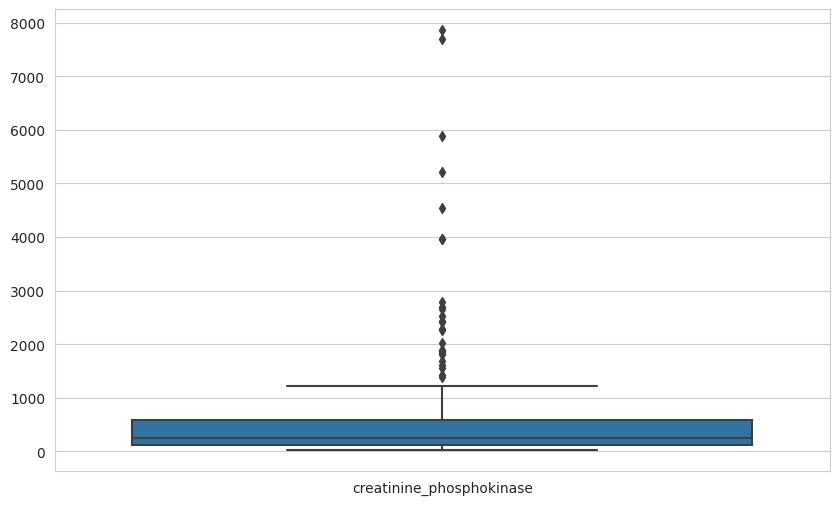

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['creatinine_phosphokinase']]) #box plot for creatinine_phosphokinase to find the outliers

Box plot for creatinine phosphokinase.

In [76]:
df = df[(df['creatinine_phosphokinase'] <= 1300) & (df['creatinine_phosphokinase'] >= 0)] #trimming the outliers

<Axes: >

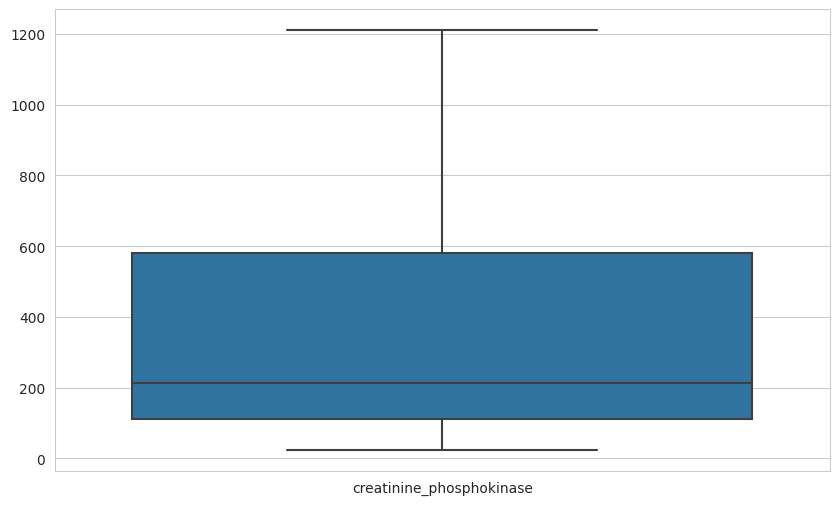

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['creatinine_phosphokinase']]) #box plot for creatinine_phosphokinase after outliers

Box Plot for creatinine phosphokinase after trimming the outliers.

Rename the column 'sex' to 'gender'

In [78]:
df.rename(columns={'sex':'gender'},inplace = True) #changing the column name to gender

In [79]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [80]:
df.drop('time', axis=1, inplace=True)

In [81]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,0


In [82]:
data = df.describe()
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,DEATH_EVENT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,61.138444,0.459677,332.116935,0.415323,38.108871,0.370968,252606.929960,1.400323,136.536290,0.645161,0.322581,0.310484
std,11.810664,0.499379,282.971906,0.493774,11.985832,0.484041,64920.248411,1.053397,4.488254,0.479432,0.468409,0.463627
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,119000.000000,0.600000,113.000000,0.000000,0.000000,0.000000
25%,51.750000,0.000000,110.750000,0.000000,30.000000,0.000000,211500.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,211.500000,0.000000,38.000000,0.000000,255000.000000,1.100000,136.500000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,293250.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,1211.000000,1.000000,80.000000,1.000000,406000.000000,9.400000,148.000000,1.000000,1.000000,1.000000


**Ploting the count plot for gender,death event,anaemia,smoking,blood pressure colums**

Text(0.5, 1.0, 'Diabetes')

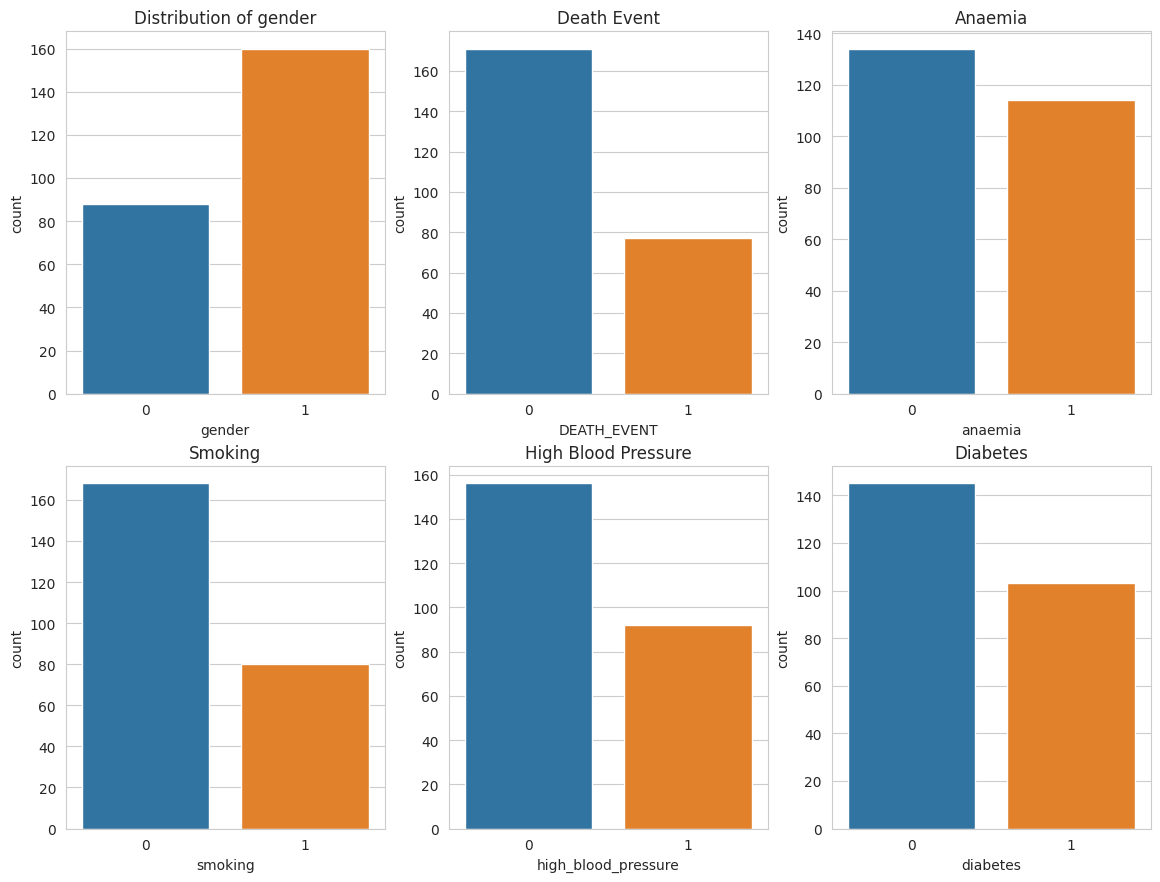

In [83]:
plt.figure(figsize=(14, 16))
#based on count

#plotting gender
plt.subplot(3, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Distribution of gender')
#plotting death event
plt.subplot(3, 3, 2)
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event')
#plotting anaemia
plt.subplot(3, 3, 3)
sns.countplot(x='anaemia', data=df)
plt.title('Anaemia')
#plotting smoking
plt.subplot(3, 3, 4)
sns.countplot(x='smoking', data=df)
plt.title('Smoking')
#plotting blood pressure range
plt.subplot(3, 3, 5)
sns.countplot(x='high_blood_pressure', data=df)
plt.title('High Blood Pressure')
#plotting diabetes values
plt.subplot(3, 3, 6)
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes')

Plotting the histplot for age,bloot platelets,creatinine phosphokinase,ejection fraction,serum creatinine, serum sodium features.

Text(0.5, 1.0, 'Serum_Sodium')

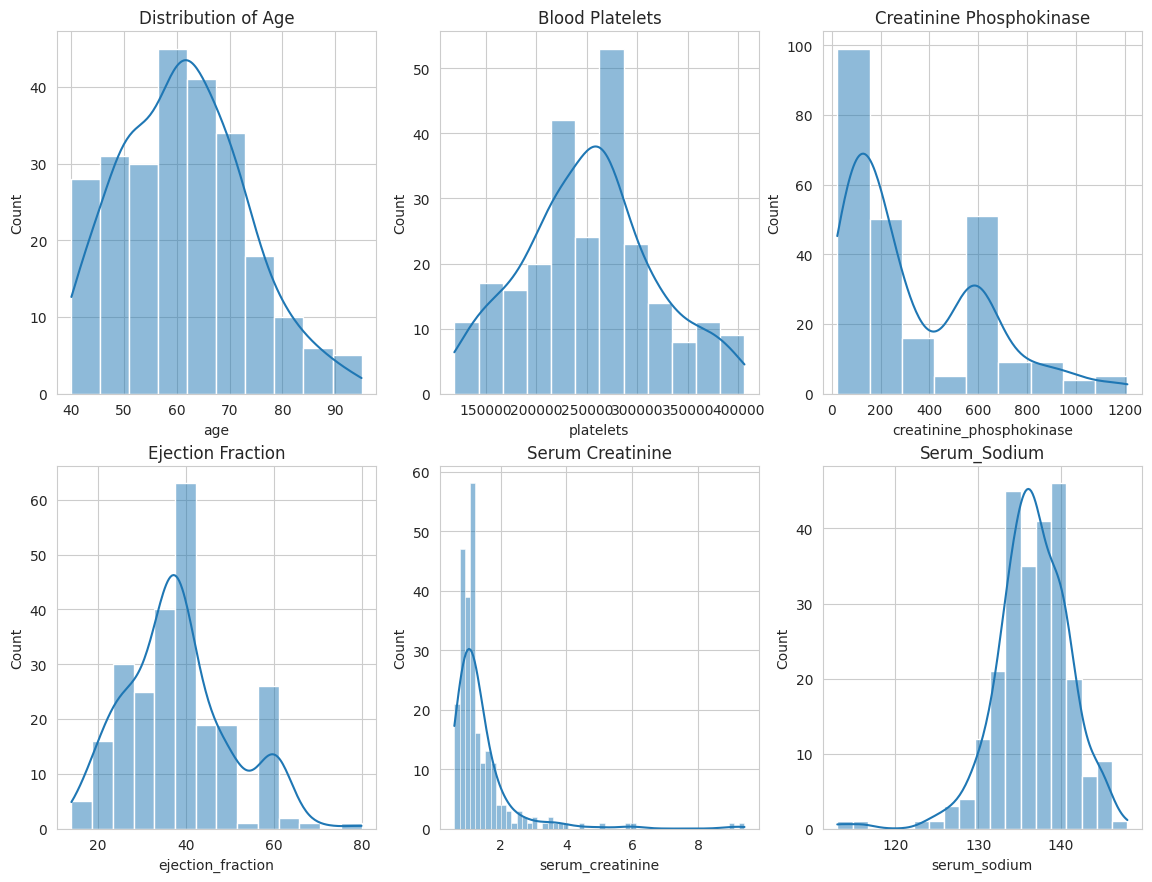

In [84]:
plt.figure(figsize=(14, 16))
#based on count

#plotting distribution of age
plt.subplot(3, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

#plotting blood platelets
plt.subplot(3, 3, 2)
sns.histplot(df['platelets'], kde=True)
plt.title('Blood Platelets')

#plotting creatinie phosphokinase
plt.subplot(3, 3, 3)
sns.histplot(df['creatinine_phosphokinase'], kde=True)
plt.title('Creatinine Phosphokinase')

#plotting ejection fraction
plt.subplot(3, 3, 4)
sns.histplot(df['ejection_fraction'], kde=True)
plt.title('Ejection Fraction')

#plotting serum creatinine
plt.subplot(3, 3, 5)
sns.histplot(df['serum_creatinine'], kde=True)
plt.title('Serum Creatinine')

#plotting serum sodium
plt.subplot(3, 3, 6)
sns.histplot(df['serum_sodium'], kde=True)
plt.title('Serum_Sodium')

Text(0.5, 1.0, 'Death Event accoding to Smoking')

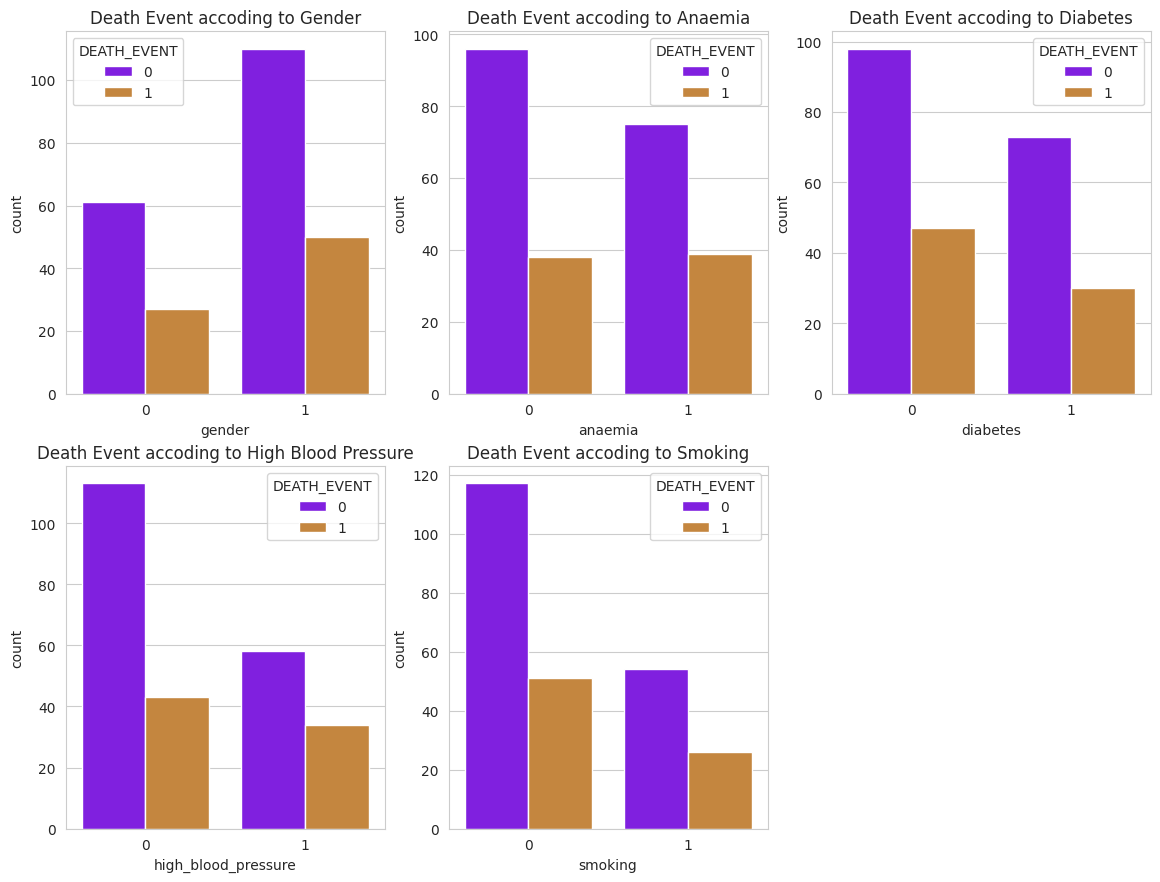

In [85]:
plt.figure(figsize=(14, 16))

#comparing death event with gender
plt.subplot(3, 3, 1)
sns.countplot(data=df,x='gender',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Gender')

#comparing death event with anaemia
plt.subplot(3, 3, 2)
sns.countplot(data=df,x='anaemia',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Anaemia')

#comparing death event with diabetes
plt.subplot(3, 3, 3)
sns.countplot(data=df,x='diabetes',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Diabetes')

#comparing death event with bp
plt.subplot(3, 3, 4)
sns.countplot(data=df,x='high_blood_pressure',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to High Blood Pressure')

#comparing death event with smoking
plt.subplot(3, 3, 5)
sns.countplot(data=df,x='smoking',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Smoking')

Death event of people with anaemia are equal to people without anaemia.

Text(0.5, 1.0, 'Distribution of Serum Sodium \nwith respect to Death Event')

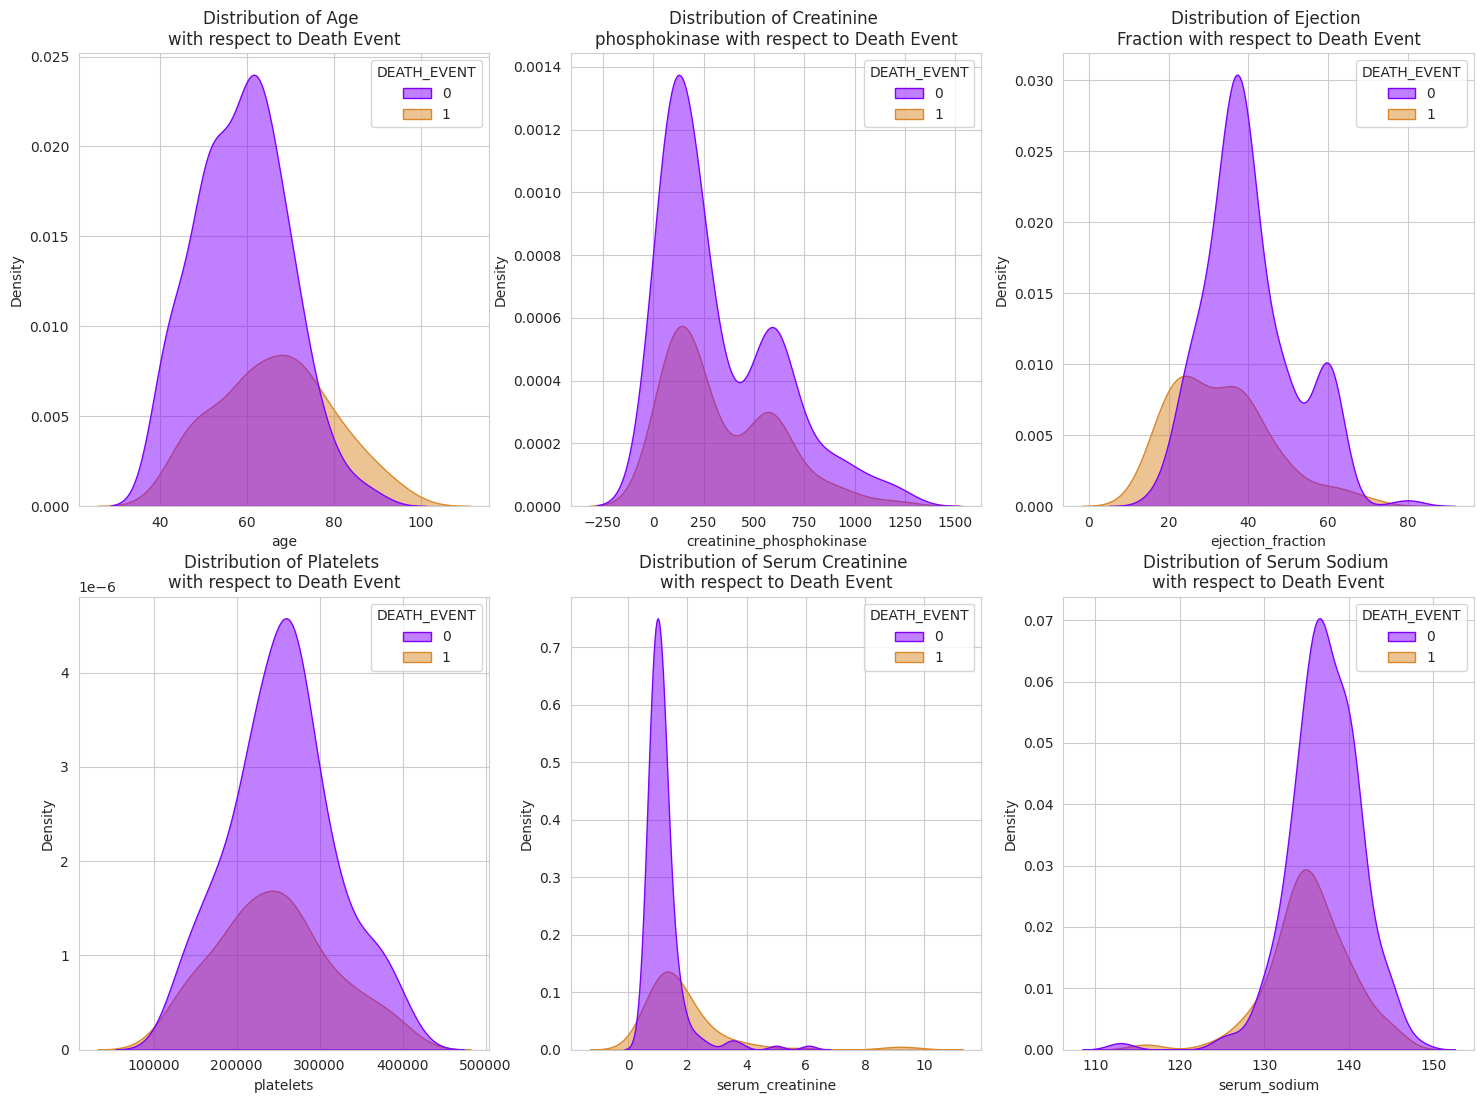

In [86]:
plt.figure(figsize=(18, 20))

#comparing death event with death event
plt.subplot(3, 3, 1)
sns.kdeplot(data=df, x='age',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Age \nwith respect to Death Event')

#comparing death event with creatinine phosphokinase
plt.subplot(3, 3, 2)
sns.kdeplot(data=df, x='creatinine_phosphokinase',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Creatinine \nphosphokinase with respect to Death Event')

#comparing death event with ejection fraction
plt.subplot(3, 3, 3)
sns.kdeplot(data=df, x='ejection_fraction',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Ejection \nFraction with respect to Death Event')

#comparing death event with platelets
plt.subplot(3, 3, 4)
sns.kdeplot(data=df, x='platelets',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Platelets \nwith respect to Death Event')

#comparing death event with serum creatinie
plt.subplot(3, 3, 5)
sns.kdeplot(data=df, x='serum_creatinine',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Serum Creatinine \nwith respect to Death Event')

#comparing death event with serum sodium
plt.subplot(3, 3, 6)
sns.kdeplot(data=df, x='serum_sodium',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Serum Sodium \nwith respect to Death Event')

Comparing age with death event.

In [87]:
v=pd.crosstab(df["age"],df["DEATH_EVENT"]).reset_index()

v.columns=["age","low_risk","high_risk"]

px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH DEATH EVENT WITH AGE")

People at the age of 58 to 60 have high death rate.

In [88]:
px.line(v,v["age"],v["low_risk"],title="RISK OF LOW DEATH_EVENT WITH AGE")

people at the range of 48 to 52, 58 to 61 and 68 to 73 have low death rate

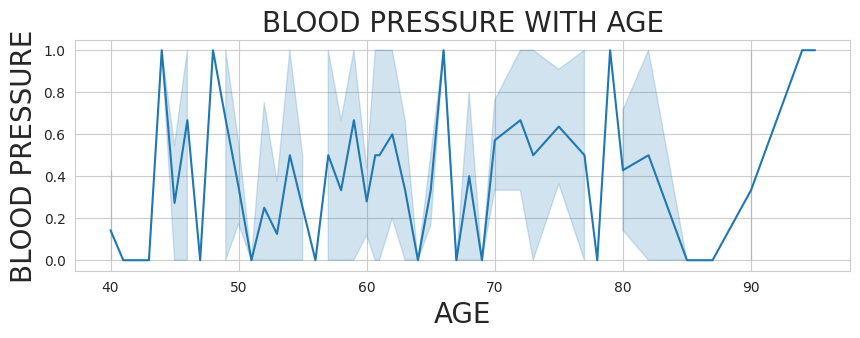

In [89]:
plt.figure(figsize=(10,3))
sns.lineplot(y="high_blood_pressure",x="age",data=df)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

BP is high for people between the age of 45 to 48,65 to 68 and at near 80s.

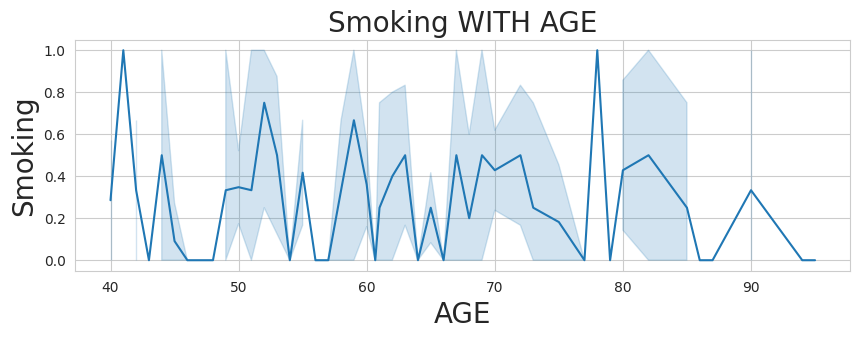

In [90]:
plt.figure(figsize=(10,3))
sns.lineplot(y="smoking",x="age",data=df)
plt.title("Smoking WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("Smoking",fontsize=20)
plt.show()

People with age between 40 to 45 and 75 to 80 are smoking more.

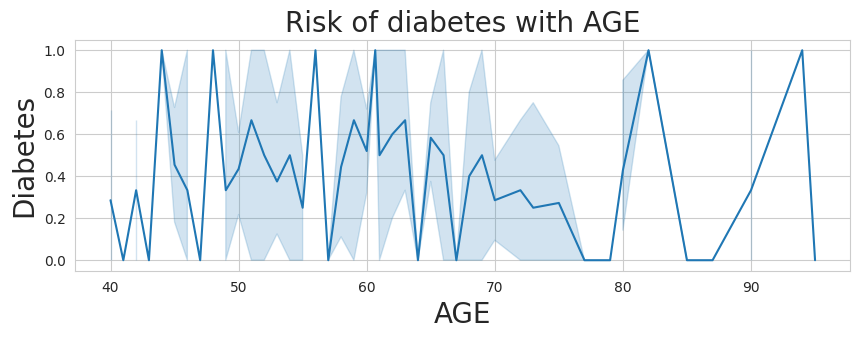

In [91]:
plt.figure(figsize=(10,3))
sns.lineplot(y="diabetes",x="age",data=df)
plt.title("Risk of diabetes with AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("Diabetes",fontsize=20)
plt.show()

Above plot shows the diabetic patients with different age categories.

Text(0.5, 1.0, 'Anaemia')

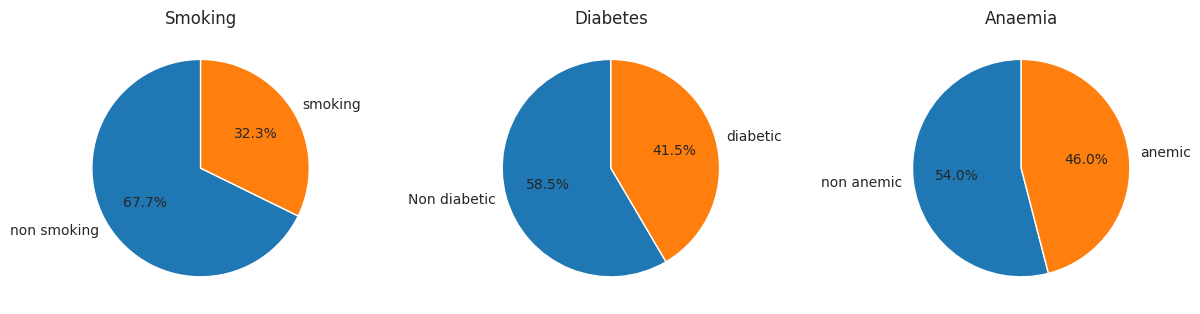

In [92]:
plt.figure(figsize=(15, 12))

#barplot for smoking
plt.subplot(3, 3, 1)
data_pie = df["smoking"].value_counts().rename_axis("smoking").reset_index(name='counts')
labels = ["non smoking","smoking"]
plt.pie(data_pie.counts, labels=labels, startangle=90, autopct='%.1f%%')
plt.title("Smoking")

#barplot for diabetes
plt.subplot(3, 3, 2)
data_pie = df["diabetes"].value_counts().rename_axis("diabetes").reset_index(name='counts')
plt.pie(data_pie.counts, labels = ["Non diabetic","diabetic"] ,startangle=90, autopct='%.1f%%')
plt.title("Diabetes")

#barplot for anaemia
plt.subplot(3, 3, 3)
data_pie = df["anaemia"].value_counts().rename_axis("anaemia").reset_index(name='counts')
plt.pie(data_pie.counts, labels = ["non anemic","anemic"] ,startangle=90, autopct='%.1f%%')
plt.title("Anaemia")

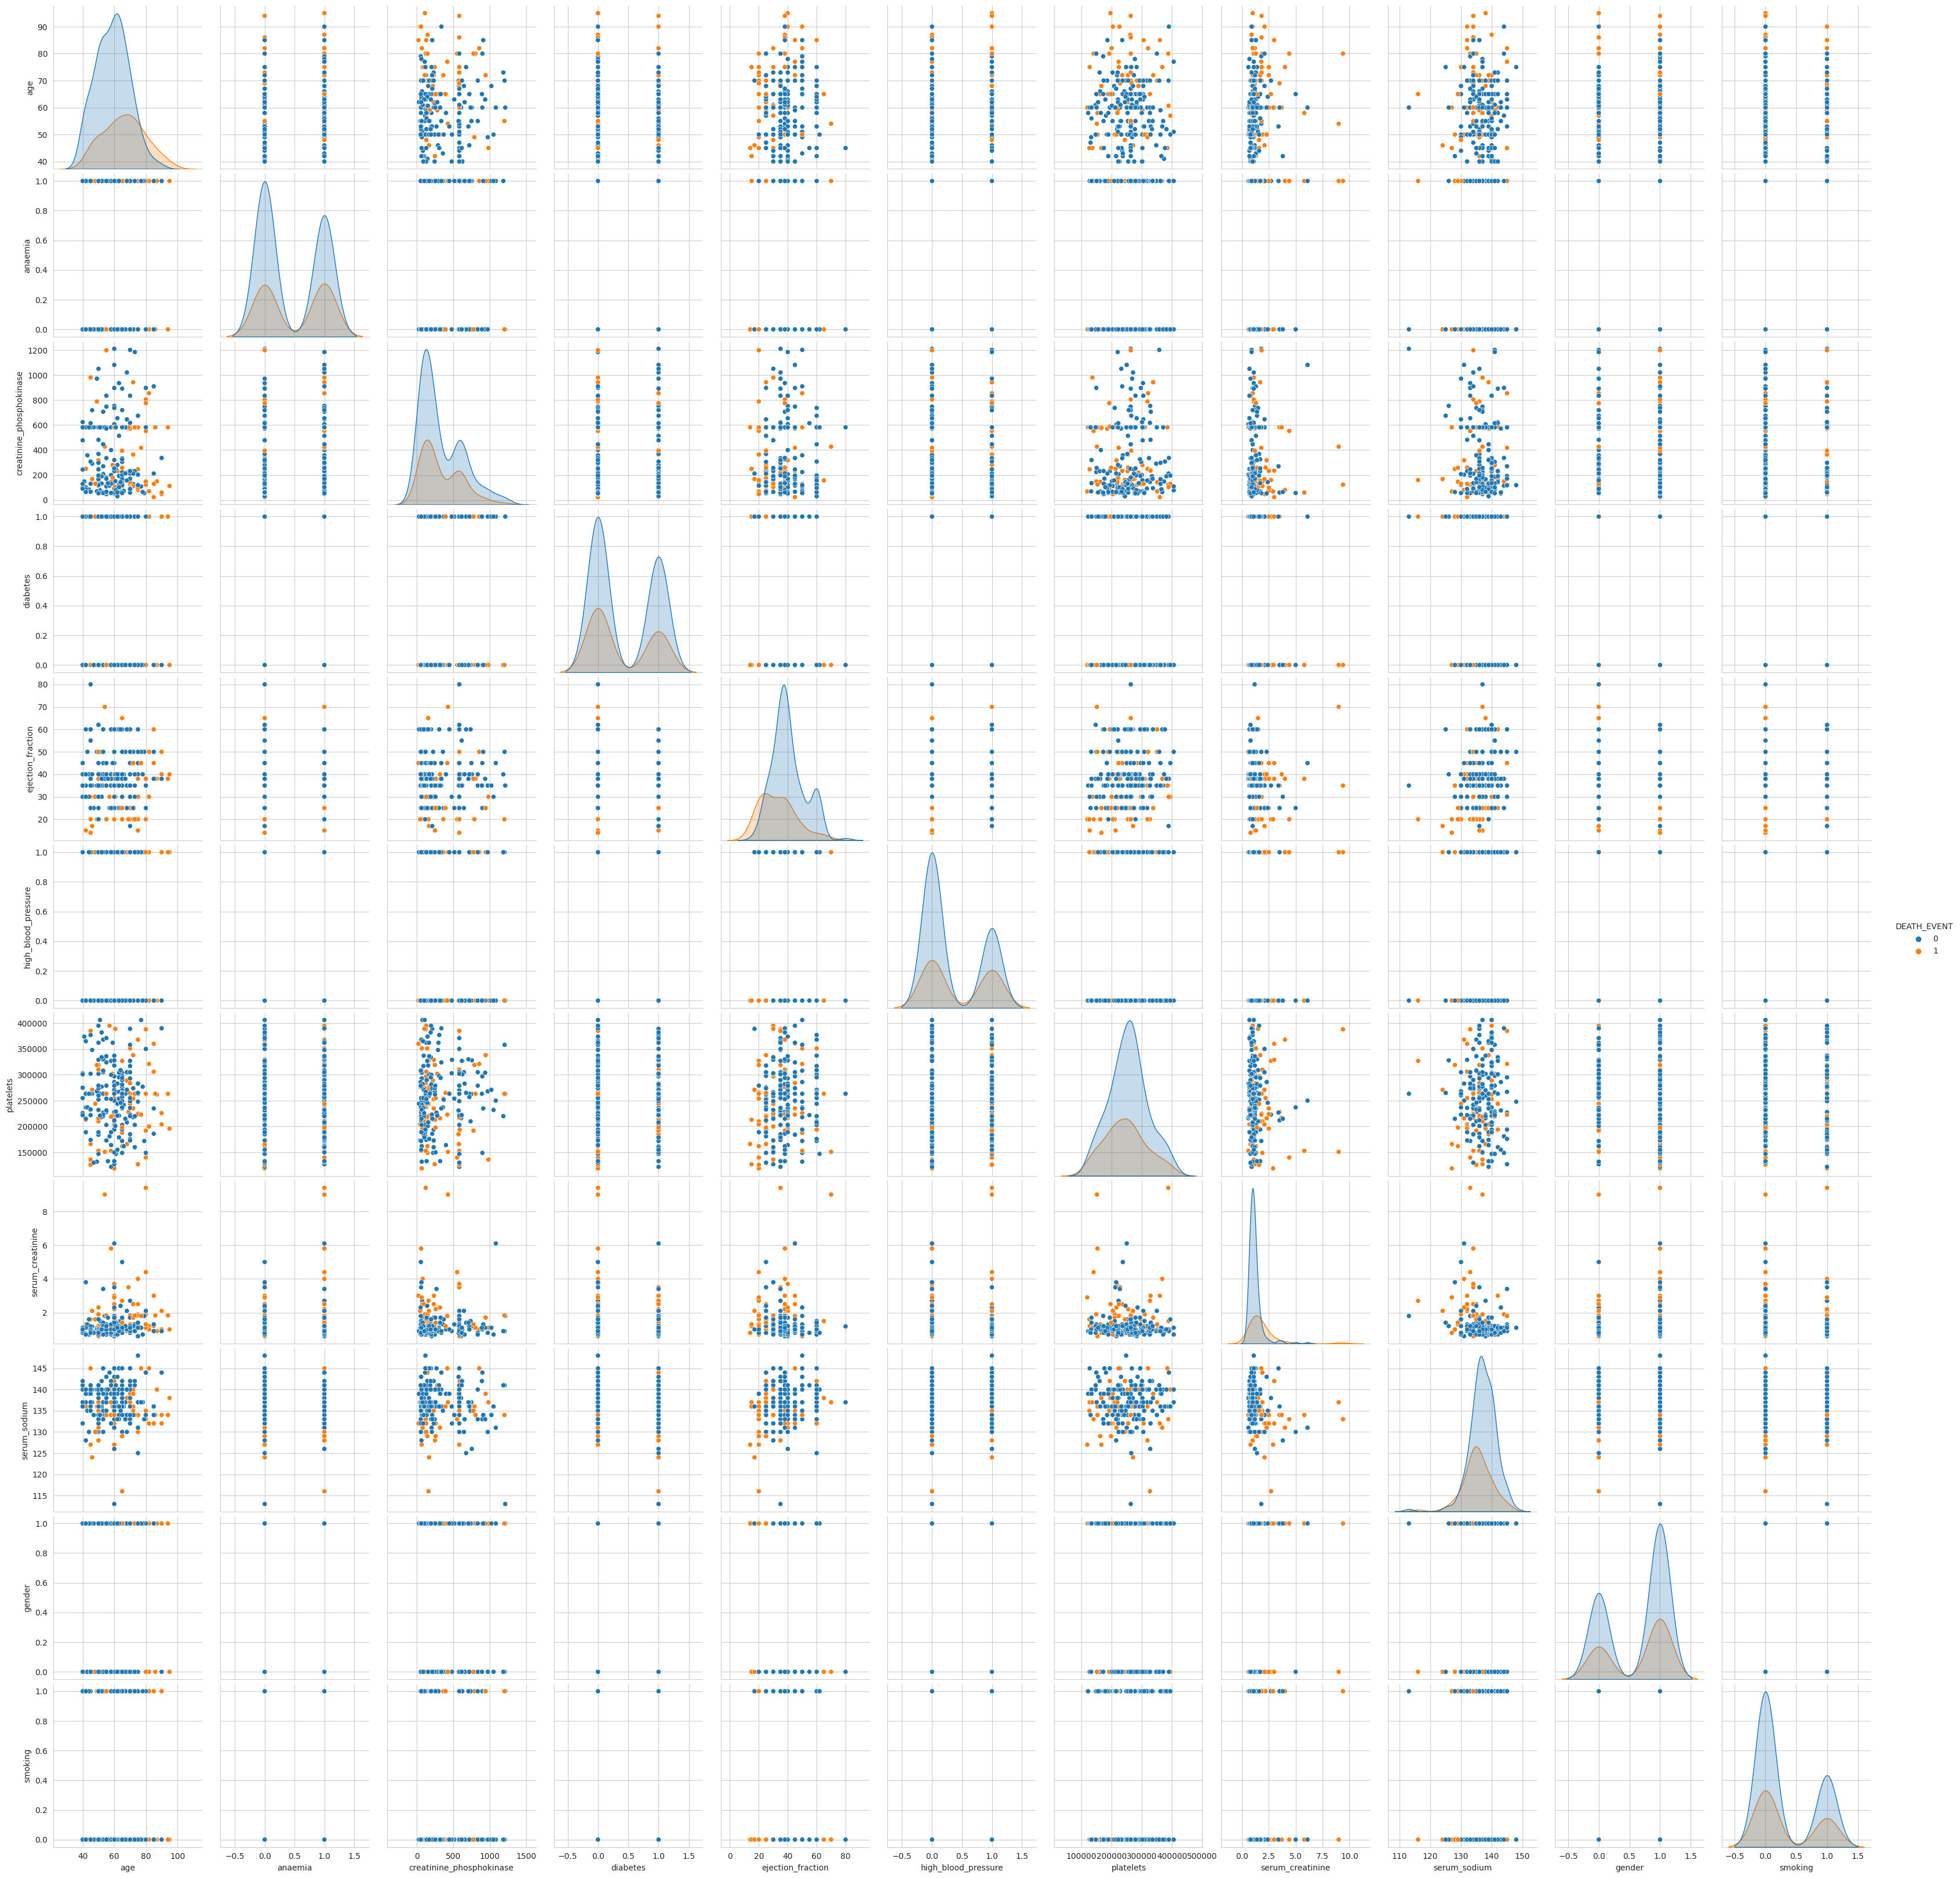

In [97]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="DEATH_EVENT", height=3);  #pairplot based on death event
plt.show()

Ploting heat plot. To understand the correlation between features

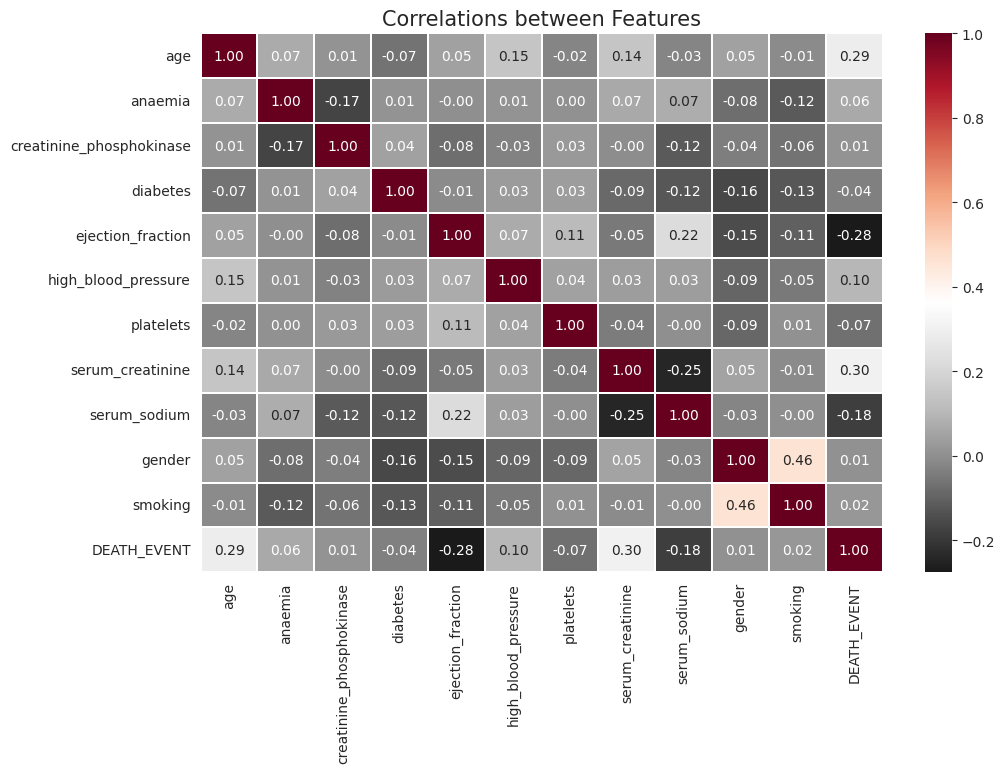

In [94]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
plt.title('Correlations between Features', fontsize=15)
plt.show()

In [100]:
X = data.drop('DEATH_EVENT',axis=1)
Y = pd.DataFrame(data['DEATH_EVENT'])

In [101]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=7)

In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [108]:
x_train

array([[-1.07251181, -0.88594662, -0.84156477, -0.86344577, -1.08786088,
        -0.83887479, -1.23783865, -0.67572197, -1.57387903, -0.95649289,
        -0.80985926],
       [-0.04069332,  0.23005244, -0.18500007,  0.15005753, -0.09917455,
         0.06908381,  0.05143508, -0.45722584,  0.28908308,  0.54388811,
        -0.01975266],
       [-0.49896592, -0.88594662, -0.65518368, -0.86344577, -0.43171313,
        -0.83887479, -0.3452366 , -0.59381895,  0.08832872, -0.95649289,
        -0.80985926],
       [ 1.61217105,  1.5418408 ,  1.68174851,  1.57683402,  1.61874856,
         1.60866578,  1.53164016,  1.72676675,  1.19646722,  1.36909767,
         1.63947119]])

In [109]:
x_test

array([[-0.95519013, -0.57735099, -0.32744684, -0.57738586, -0.78069048,
        -0.5774464 , -0.71515489, -0.5785762 , -1.48019242, -0.58059165,
        -0.57754363],
       [-0.41772046, -0.58201062, -0.81353532, -0.58199316, -0.5053537 ,
        -0.58196282,  0.82199125, -0.57814015,  0.04927382, -0.57572787,
        -0.5819141 ],
       [ 1.67909815,  1.73204138, -0.56529471,  1.73204138,  1.71730911,
         1.73204138, -1.23814956,  1.73204947,  1.34109436,  1.73204739,
         1.73204137],
       [-0.30618756, -0.57267977,  1.70627687, -0.57266237, -0.43126494,
        -0.57263216,  1.1313132 , -0.57533311,  0.08982424, -0.57572787,
        -0.57258364]])